Zsanett Borsos

Customer Analysis Round 2 

In [1]:
import pandas as pd
import numpy as np
import math
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
file = pd.read_csv('C:/Users/zsbor/OneDrive/Desktop/Labs/CustomerAnalysisLab2/marketing_customer_analysis.csv')
file

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


Show the dataframe shape

In [3]:
# Show the dataframe shape
file.shape

(10910, 26)

Standardize header names

In [4]:
# Show columns of dataframe
file.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [5]:
# rename headernames
file = file.rename({'Unnamed: 0':'unnamed', 'Customer':'customer', 'State':'state', 'Customer Lifetime Value':'customer_lifetime_value', 'Response':'response', 'Coverage':'coverage', 'Education':'education', 'Effective To Date':'effective_to_date', 'EmploymentStatus':'emplyment_status', 'Gender':'gender', 'Income':'income', 'Location Code':'location_code', 'Marital Status':'matiral_status', 'Monthly Premium Auto':'monthly_premium_auto', 'Months Since Last Claim':'months_since_last_claim', 'Months Since Policy Inception':'months_since_policy_inception', 'Number of Open Complaints':'number_of_open_complaints', 'Number of Policies':'number_of_policies', 'Policy Type':'policy_type', 'Policy':'policy', 'Renew Offer Type':'renewal_offer_type', 'Sales Channel':'sales_channel', 'Total Claim Amount':'total_claim_amount', 'Vehicle Class':'vehicle_class', 'Vehicle Size':'vehicle_size','Vehicle Type':'vehicle_type'}, axis='columns')

In [6]:
file.columns

Index(['unnamed', 'customer', 'state', 'customer_lifetime_value', 'response',
       'coverage', 'education', 'effective_to_date', 'emplyment_status',
       'gender', 'income', 'location_code', 'matiral_status',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renewal_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')

In [7]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed                        10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10279 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10279 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   emplyment_status               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  matiral_status                 10910 non-null 

In [8]:
# Delete unnamed column as it is unnecessary
file = file.drop(['unnamed'], axis=1)
file

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,emplyment_status,gender,income,location_code,matiral_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renewal_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


Which columns are numerical?

In [9]:
file.select_dtypes(exclude=['object']).columns.tolist()

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

Which columns are categorical?

In [10]:
file.select_dtypes(include=['object']).columns.tolist()

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'emplyment_status',
 'gender',
 'location_code',
 'matiral_status',
 'policy_type',
 'policy',
 'renewal_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type']

Check and deal with NaN values.

In [11]:
# shows the number of NaN values in each column
file.isnull().sum(axis = 0)

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
emplyment_status                    0
gender                              0
income                              0
location_code                       0
matiral_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renewal_offer_type                  0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [12]:
# Another way to show the number of NaN values in each column
count_nan = len(file) - file.count()
count_nan

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
emplyment_status                    0
gender                              0
income                              0
location_code                       0
matiral_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renewal_offer_type                  0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [13]:
# Shows the percentage of NaN values in a column
file.isnull().sum()* 100 / len(file)


customer                          0.000000
state                             5.783685
customer_lifetime_value           0.000000
response                          5.783685
coverage                          0.000000
education                         0.000000
effective_to_date                 0.000000
emplyment_status                  0.000000
gender                            0.000000
income                            0.000000
location_code                     0.000000
matiral_status                    0.000000
monthly_premium_auto              0.000000
months_since_last_claim           5.802016
months_since_policy_inception     0.000000
number_of_open_complaints         5.802016
number_of_policies                0.000000
policy_type                       0.000000
policy                            0.000000
renewal_offer_type                0.000000
sales_channel                     0.000000
total_claim_amount                0.000000
vehicle_class                     5.701192
vehicle_siz

In [14]:
# Cleaning up the data: fixin NaN values in categorical columns
# Categorical columns with NaN values are: state, response, vehicle_class, vehicle_size and vehicles_type
file.select_dtypes(include=['object']).columns.tolist()

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'emplyment_status',
 'gender',
 'location_code',
 'matiral_status',
 'policy_type',
 'policy',
 'renewal_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type']

In [15]:
# I am dropping column vehicle_type because over 50% of NaN values
file = file.drop(['vehicle_type'], axis=1)
file.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'emplyment_status', 'gender',
       'income', 'location_code', 'matiral_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renewal_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [16]:
# I'm replacing NaN with NA in state, response, vehicle_class, and vehicle_size
file['state'] = file['state'].fillna('NA')
file['state'].unique()

array(['Arizona', 'California', 'Washington', 'Oregon', 'NA', 'Nevada'],
      dtype=object)

In [17]:
file['response'] = file['response'].fillna('NA')
file['response'].unique()

array(['No', 'Yes', 'NA'], dtype=object)

In [18]:
file['vehicle_class'] = file['vehicle_class'].fillna('NA')
file['vehicle_class'].unique()

array(['Four-Door Car', 'SUV', 'Two-Door Car', 'Sports Car', 'Luxury Car',
       'Luxury SUV', 'NA'], dtype=object)

In [19]:
file['vehicle_size'] = file['vehicle_size'].fillna('NA')
file['vehicle_size'].unique()

array(['Medsize', 'Small', 'Large', 'NA'], dtype=object)

In [20]:
# Show the percentage of NaN values in each column now
file.isnull().sum()* 100 / len(file)

customer                         0.000000
state                            0.000000
customer_lifetime_value          0.000000
response                         0.000000
coverage                         0.000000
education                        0.000000
effective_to_date                0.000000
emplyment_status                 0.000000
gender                           0.000000
income                           0.000000
location_code                    0.000000
matiral_status                   0.000000
monthly_premium_auto             0.000000
months_since_last_claim          5.802016
months_since_policy_inception    0.000000
number_of_open_complaints        5.802016
number_of_policies               0.000000
policy_type                      0.000000
policy                           0.000000
renewal_offer_type               0.000000
sales_channel                    0.000000
total_claim_amount               0.000000
vehicle_class                    0.000000
vehicle_size                     0

In [21]:
# Next I will drop rows that contain NaN in columns months_since_last_claim and number_of_open_complaints
file = file.dropna()
file

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,emplyment_status,gender,income,location_code,matiral_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renewal_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
5,HO81102,NA,4745.181764,NA,Basic,High School or Below,2/14/11,Employed,M,50549,Suburban,Divorced,61,2.0,73,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,Suburban,Single,187,14.0,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [22]:
# Show the percentage of NaN values in each column now
file.isnull().sum()* 100 / len(file)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
emplyment_status                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
matiral_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renewal_offer_type               0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [23]:
# Solution 1
# I created a new column called "effective_to_month" where I took the first digit of the "effective_to_date" column
file['effective_to_month'] = file['effective_to_date'].str[:1]
file

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,emplyment_status,gender,income,location_code,matiral_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renewal_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
5,HO81102,NA,4745.181764,NA,Basic,High School or Below,2/14/11,Employed,M,50549,Suburban,Divorced,61,2.0,73,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,Suburban,Single,187,14.0,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2


In [24]:
# I converted the values in the new column effective_to_month to integers
file['effective_to_month'] = file['effective_to_month'].apply(int)
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10277 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10277 non-null  object 
 1   state                          10277 non-null  object 
 2   customer_lifetime_value        10277 non-null  float64
 3   response                       10277 non-null  object 
 4   coverage                       10277 non-null  object 
 5   education                      10277 non-null  object 
 6   effective_to_date              10277 non-null  object 
 7   emplyment_status               10277 non-null  object 
 8   gender                         10277 non-null  object 
 9   income                         10277 non-null  int64  
 10  location_code                  10277 non-null  object 
 11  matiral_status                 10277 non-null  object 
 12  monthly_premium_auto           10277 non-null 

In [25]:
# I created a filte to filter out values that equal 1 in effective to month column. 
# Could not figure out how to make that less than or equal to 3.
effective_to_month_filter = file[file.effective_to_month.eq(1)]
effective_to_month_filter

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,emplyment_status,gender,income,location_code,matiral_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renewal_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_month
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
8,FM55990,California,5989.773931,Yes,Premium,College,1/19/11,Employed,M,66839,Suburban,Single,154,33.0,24,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,1
9,QX31376,Oregon,17114.328150,No,Extended,Master,1/4/11,Employed,F,70961,Suburban,Married,85,19.0,8,0.0,2,Corporate Auto,Corporate L3,Offer2,Agent,408.000000,Four-Door Car,Small,1
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,82730,Urban,Married,127,13.0,31,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10901,RY92254,Washington,4547.892543,No,Premium,Bachelor,1/13/11,Employed,M,33531,Suburban,Married,116,11.0,15,0.0,1,Personal Auto,Personal L3,Offer4,Agent,801.577478,Two-Door Car,Medsize,1
10902,PP30874,California,3579.023825,No,Extended,High School or Below,1/24/11,Employed,F,28304,Suburban,Married,91,10.0,30,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,1
10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,Suburban,Married,74,30.0,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1


In [26]:
# Solution 2
# Created another filter that filters results that are less than or equal to 3
effective_to_month_filter2 = file[file['effective_to_month']<=3]
effective_to_month_filter2

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,emplyment_status,gender,income,location_code,matiral_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renewal_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
5,HO81102,NA,4745.181764,NA,Basic,High School or Below,2/14/11,Employed,M,50549,Suburban,Divorced,61,2.0,73,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,Suburban,Single,187,14.0,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2


End of Customer Analysis Round 2

Customer Analysis Round 3

Show DataFrame info.

In [27]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10277 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10277 non-null  object 
 1   state                          10277 non-null  object 
 2   customer_lifetime_value        10277 non-null  float64
 3   response                       10277 non-null  object 
 4   coverage                       10277 non-null  object 
 5   education                      10277 non-null  object 
 6   effective_to_date              10277 non-null  object 
 7   emplyment_status               10277 non-null  object 
 8   gender                         10277 non-null  object 
 9   income                         10277 non-null  int64  
 10  location_code                  10277 non-null  object 
 11  matiral_status                 10277 non-null  object 
 12  monthly_premium_auto           10277 non-null 

Describe DataFrame.

In [28]:
file.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_month
count,10277.000000,10277.000000,10277.000000,10277.000000,10277.000000,10277.000000,10277.000000,10277.000000,10277.000000
mean,8030.503327,37648.597743,93.192274,15.149071,48.087769,0.384256,2.965846,433.874870,1.465311
std,6930.733408,30377.415086,34.512179,10.080349,27.936582,0.912457,2.390763,291.681330,0.498819
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4002.857594,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.074379,1.000000
50%,5764.862315,33938.000000,83.000000,14.000000,48.000000,0.000000,2.000000,380.917107,1.000000
75%,8986.610653,62326.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


Show a plot of the total number of responses.

In [29]:
file['response'].value_counts()

No     8300
Yes    1388
NA      589
Name: response, dtype: int64

In [30]:
file['response'].unique()

array(['No', 'Yes', 'NA'], dtype=object)

<AxesSubplot:>

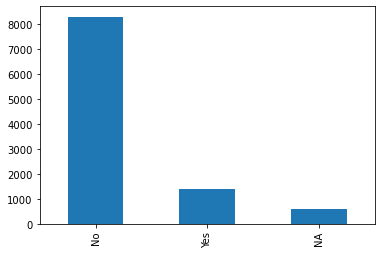

In [31]:
file['response'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='response', ylabel='count'>

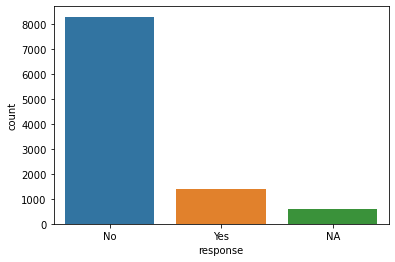

In [32]:
sb.countplot(x='response', data=file)

<AxesSubplot:ylabel='response'>

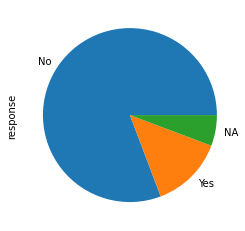

In [33]:
file['response'].value_counts().plot(kind='pie')

Show a plot of the response rate by the sales channel

In [34]:
file['sales_channel'].value_counts()

Agent          3887
Branch         2871
Call Center    1998
Web            1521
Name: sales_channel, dtype: int64

<AxesSubplot:>

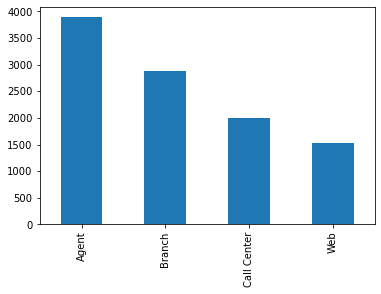

In [35]:
file['sales_channel'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='sales_channel'>

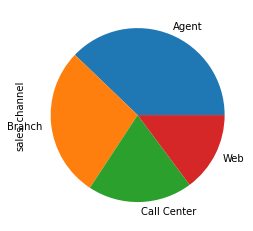

In [36]:
file['sales_channel'].value_counts().plot(kind='pie')

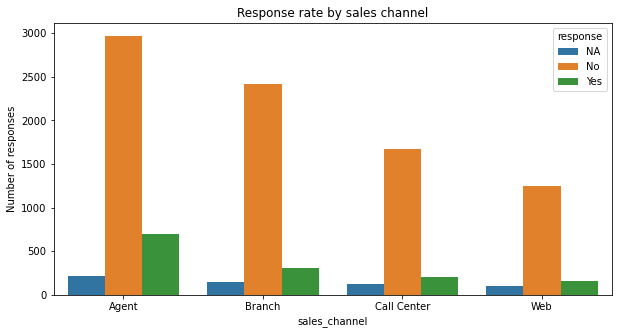

In [37]:
chart = file.groupby(['response','sales_channel']).size().reset_index(name = 'Number of responses')
f, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Response rate by sales channel')
fig = sns.barplot(x=chart["sales_channel"], y = chart["Number of responses"], hue=chart['response'], alpha=1)


Show a plot of the response rate by the total claim amount.

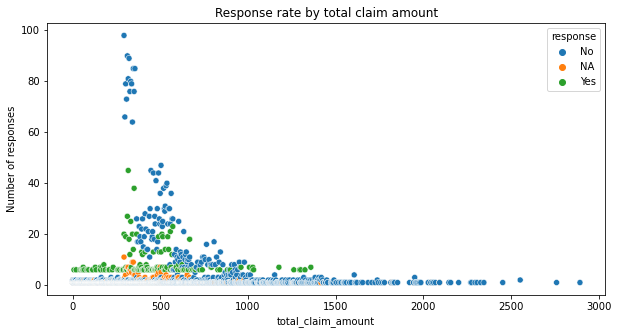

In [38]:
chart2 = file.groupby(['total_claim_amount','response']).size().reset_index(name = 'Number of responses')
f, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Response rate by total claim amount')
fig = sns.scatterplot(x=chart2["total_claim_amount"], y = chart2["Number of responses"], hue=chart2['response'], alpha=1)


Show a plot of the response rate by income.

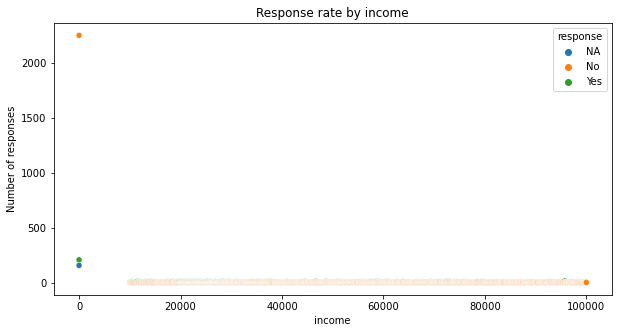

In [39]:
chart3 = file.groupby(['income','response']).size().reset_index(name = 'Number of responses')
f, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Response rate by income')
fig = sb.scatterplot(x=chart3["income"], y = chart3["Number of responses"], hue=chart3['response'], alpha=1)


<AxesSubplot:title={'center':'Response rate by income'}, xlabel='sales_channel', ylabel='income'>

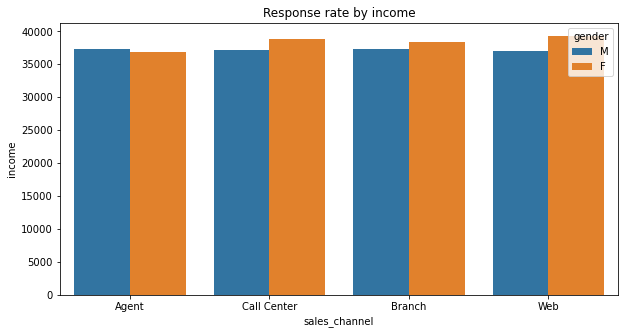

In [40]:
chart4 = file.groupby(['sales_channel','income']).size().reset_index(name = 'Income')
f, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Response rate by income')
sb.barplot(x = 'sales_channel', y = 'income', hue = 'gender', data = file, ci = None)

End of customer analysis round 3

Customer Analysis Round 4

Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [41]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10277 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10277 non-null  object 
 1   state                          10277 non-null  object 
 2   customer_lifetime_value        10277 non-null  float64
 3   response                       10277 non-null  object 
 4   coverage                       10277 non-null  object 
 5   education                      10277 non-null  object 
 6   effective_to_date              10277 non-null  object 
 7   emplyment_status               10277 non-null  object 
 8   gender                         10277 non-null  object 
 9   income                         10277 non-null  int64  
 10  location_code                  10277 non-null  object 
 11  matiral_status                 10277 non-null  object 
 12  monthly_premium_auto           10277 non-null 

In [42]:
categorical = file.select_dtypes(include=['object'])
categorical

,customer,state,response,coverage,education,effective_to_date,emplyment_status,gender,location_code,matiral_status,policy_type,policy,renewal_offer_type,sales_channel,vehicle_class,vehicle_size
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
5,HO81102,NA,NA,Basic,High School or Below,2/14/11,Employed,M,Suburban,Divorced,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,QI63521,Nevada,No,Basic,High School or Below,2/24/11,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


In [43]:
numerical = file.select_dtypes(exclude=['object'])
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_month
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
5,4745.181764,50549,61,2.0,73,0.0,7,292.800000,2
...,...,...,...,...,...,...,...,...,...
10904,19228.463620,0,187,14.0,32,0.0,2,897.600000,2
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2


Now we will try to check the normality of the numerical variables visually
Use seaborn library to construct distribution plots for the numerical variables

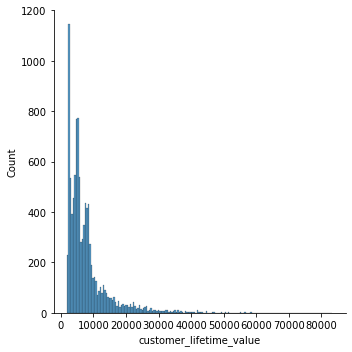

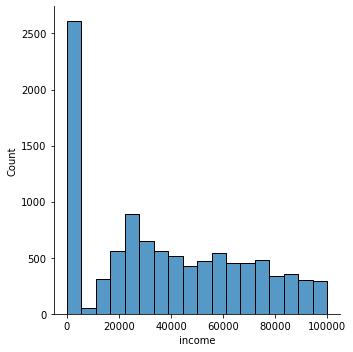

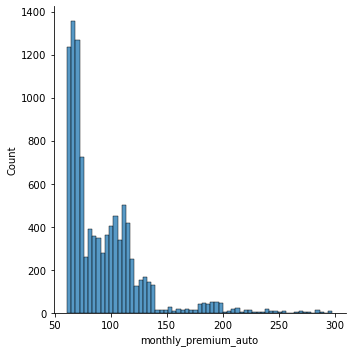

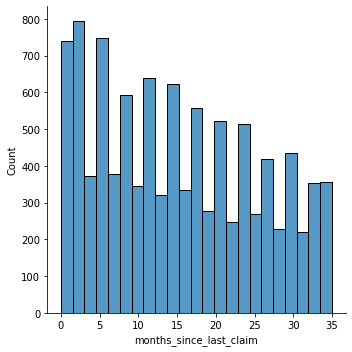

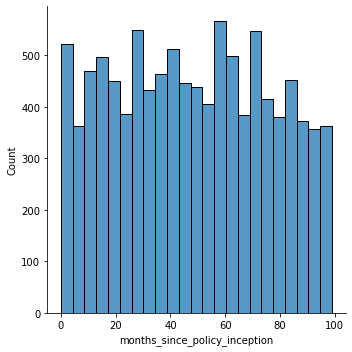

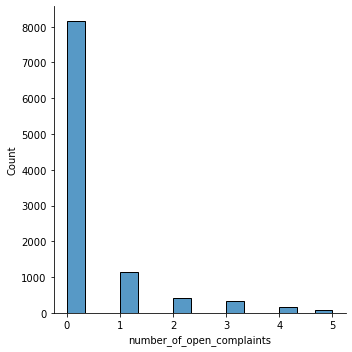

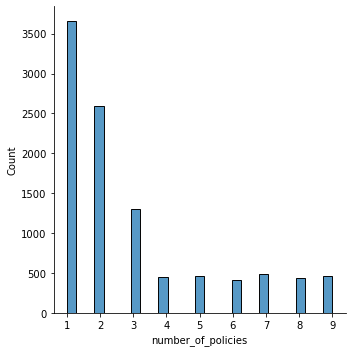

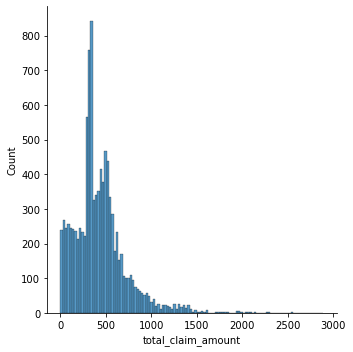

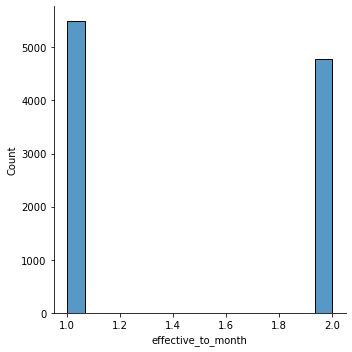

In [44]:
sns.displot(file, x="customer_lifetime_value")
sns.displot(file, x="income")
sns.displot(file, x="monthly_premium_auto")
sns.displot(file, x="months_since_last_claim")
sns.displot(file, x="months_since_policy_inception")
sns.displot(file, x="number_of_open_complaints")
sns.displot(file, x="number_of_policies")
sns.displot(file, x="total_claim_amount")
sns.displot(file, x="effective_to_month")


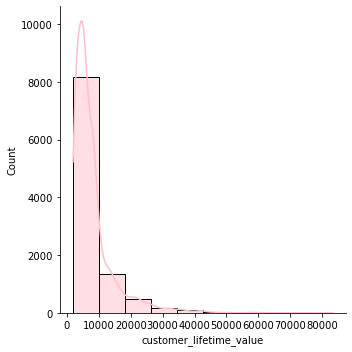

In [45]:
# changing color, trasparency, number of bins and addig kernel density estimate line
sns.displot(file, x="customer_lifetime_value", color = 'pink', alpha = 0.5, kde = True, bins=10)

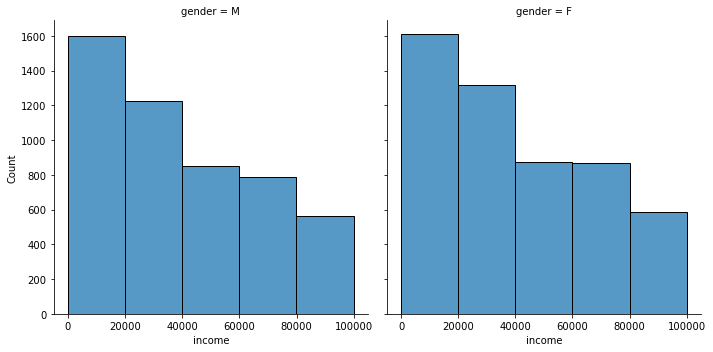

In [46]:
# seaparte graphs for males and females based on income with col command
sns.displot(file, x="income", bins=5, col = 'gender')

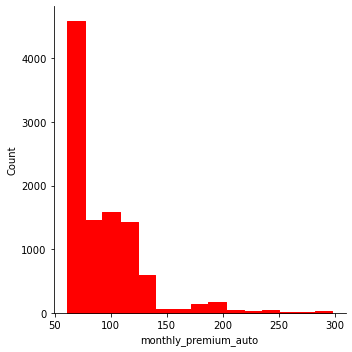

In [47]:
# trying step element, fewer bins
sns.displot(file, x="monthly_premium_auto", color = 'red', alpha = 1, bins = 15, element = 'step')

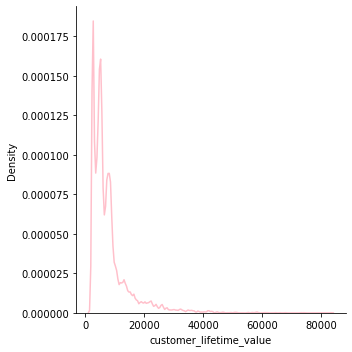

In [48]:
sns.displot(data = file
            ,x = 'customer_lifetime_value'
            ,color = 'pink'
            ,alpha = 0.5
            ,kind = 'kde'
            ,bw_adjust = .25 
            )

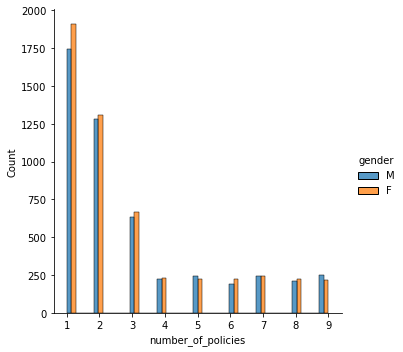

In [49]:
sns.displot(file, x="number_of_policies", hue = "gender", multiple = "dodge")

Use Matplotlib to construct histograms

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:title={'center':'effective_to_month'}>]],
      dtype=object)

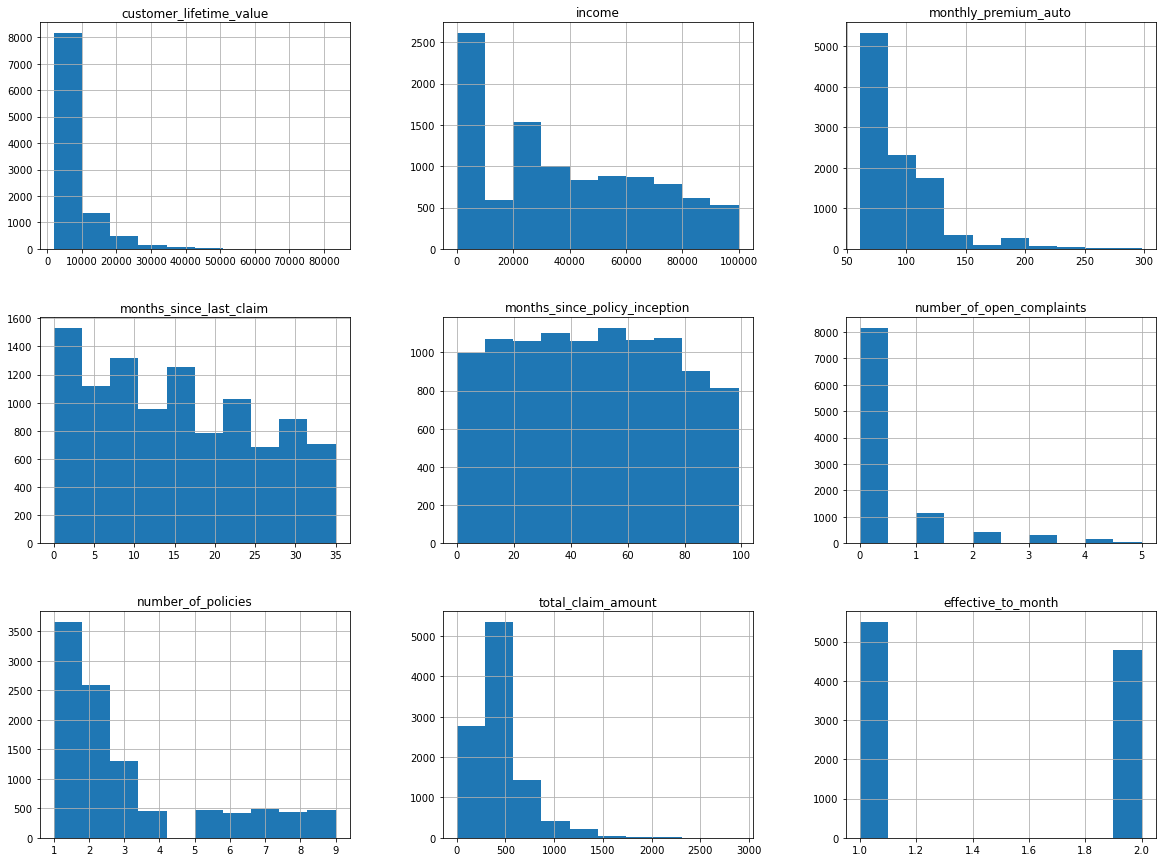

In [50]:
numerical.hist(figsize=(20,15))

Do the distributions for different numerical variables look like a normal distribution?

Only the one for "months_since_policy_inception" looks kind of normal.

For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features.

In [51]:
correl_matrix = numerical.corr()
correl_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_month
customer_lifetime_value,1.000000,0.028186,0.400924,0.016052,0.015130,-0.032243,0.017150,0.233250,-0.006721
income,0.028186,1.000000,-0.008384,-0.023814,-0.009282,0.007163,-0.008250,-0.350660,-0.002559
monthly_premium_auto,0.400924,-0.008384,1.000000,0.008744,0.021881,-0.010350,-0.019203,0.633054,0.009008
months_since_last_claim,0.016052,-0.023814,0.008744,1.000000,-0.039318,0.002246,0.007678,0.013137,-0.019951
months_since_policy_inception,0.015130,-0.009282,0.021881,-0.039318,1.000000,0.004376,-0.008141,0.006861,0.012984
number_of_open_complaints,-0.032243,0.007163,-0.010350,0.002246,0.004376,1.000000,0.004098,-0.011379,-0.004813
number_of_policies,0.017150,-0.008250,-0.019203,0.007678,-0.008141,0.004098,1.000000,-0.006182,0.006147
total_claim_amount,0.233250,-0.350660,0.633054,0.013137,0.006861,-0.011379,-0.006182,1.000000,0.005349
effective_to_month,-0.006721,-0.002559,0.009008,-0.019951,0.012984,-0.004813,0.006147,0.005349,1.000000


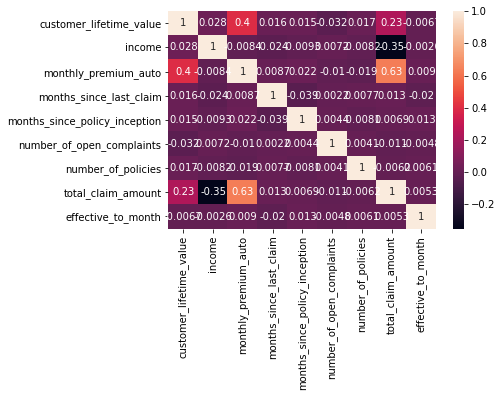

In [52]:
sns.heatmap(correl_matrix, annot=True, )
plt.show()

End of lab 4

Customer Analysis Lab 5

Processing Data
(Further processing...)

X-y split.

In [53]:
y = numerical['total_claim_amount']
X = numerical[['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'effective_to_month']]
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_month
0,4809.216960,48029,61,7.0,52,0.0,9,2
1,2228.525238,0,64,3.0,26,0.0,1,1
2,14947.917300,22139,100,34.0,31,0.0,2,2
3,22332.439460,49078,97,10.0,3,0.0,2,1
5,4745.181764,50549,61,2.0,73,0.0,7,2
...,...,...,...,...,...,...,...,...
10904,19228.463620,0,187,14.0,32,0.0,2,2
10906,5259.444853,61146,65,7.0,68,0.0,6,1
10907,23893.304100,39837,201,11.0,63,0.0,2,2
10908,11971.977650,64195,158,0.0,27,4.0,6,2


Normalize (numerical)

In [54]:
transformer = MinMaxScaler().fit(X)
x_normalized = transformer.transform(X)
normalized_X = pd.DataFrame(x_normalized, columns=X.columns)
normalized_X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_month
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0
4,0.034966,0.505586,0.000000,0.057143,0.737374,0.0,0.750,1.0
...,...,...,...,...,...,...,...,...
10272,0.212833,0.000000,0.531646,0.400000,0.323232,0.0,0.125,1.0
10273,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.0
10274,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,1.0
10275,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625,1.0


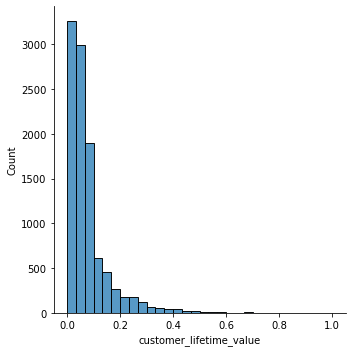

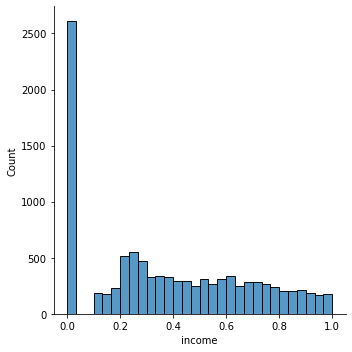

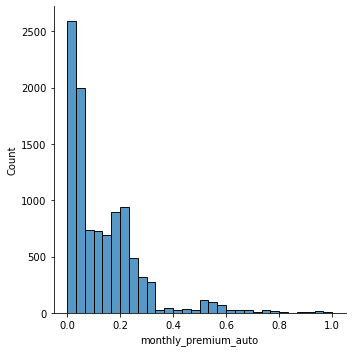

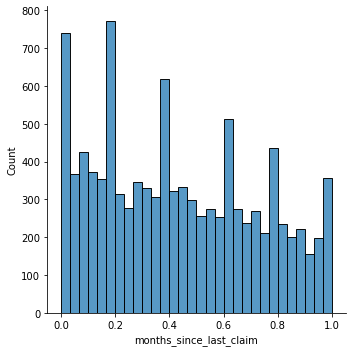

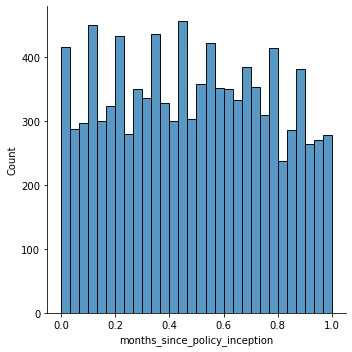

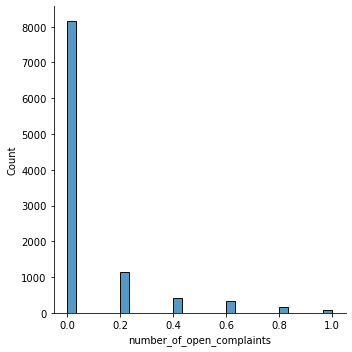

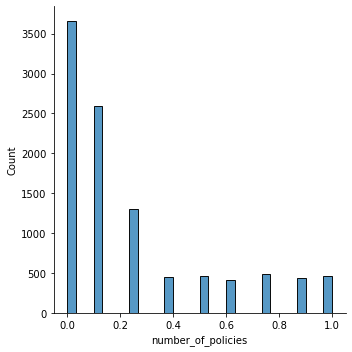

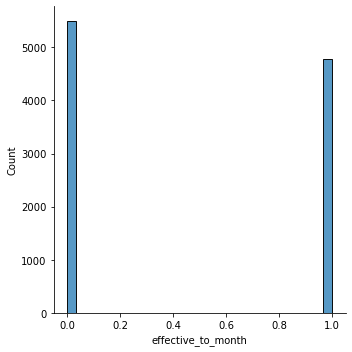

In [55]:
sns.displot(x=normalized_X["customer_lifetime_value"], bins=30)
sns.displot(x=normalized_X["income"], bins=30)
sns.displot(x=normalized_X["monthly_premium_auto"], bins=30)
sns.displot(x=normalized_X["months_since_last_claim"], bins=30)
sns.displot(x=normalized_X["months_since_policy_inception"], bins=30)
sns.displot(x=normalized_X["number_of_open_complaints"], bins=30)
sns.displot(x=normalized_X["number_of_policies"], bins=30)
sns.displot(x=normalized_X["effective_to_month"], bins=30)


End of lab 5.

Customer Analysis Lab 6

Processing Data

One Hot/Label Encoding (categorical).

In [56]:
categorical

,customer,state,response,coverage,education,effective_to_date,emplyment_status,gender,location_code,matiral_status,policy_type,policy,renewal_offer_type,sales_channel,vehicle_class,vehicle_size
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
5,HO81102,NA,NA,Basic,High School or Below,2/14/11,Employed,M,Suburban,Divorced,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,QI63521,Nevada,No,Basic,High School or Below,2/24/11,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


In [57]:
label_encoding = pd.DataFrame(data = None, columns=categorical.columns)
for col in categorical :
    label_encoding[col] = LabelEncoder().fit(categorical[col]).transform(categorical[col])
display(label_encoding)

,customer,state,response,coverage,education,effective_to_date,emplyment_status,gender,location_code,matiral_status,policy_type,policy,renewal_offer_type,sales_channel,vehicle_class,vehicle_size
0,1159,0,1,0,1,40,1,1,1,1,0,2,2,0,0,1
1,3815,1,1,0,1,9,4,0,1,2,1,5,3,2,0,1
2,4223,5,1,0,0,32,1,1,1,2,1,5,2,2,4,1
3,8235,4,2,1,1,2,1,1,1,2,0,2,1,1,0,1
4,2651,2,0,0,3,36,1,1,1,0,1,5,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10272,5709,3,1,0,3,47,4,1,1,2,1,4,0,1,2,1
10273,3810,4,1,0,1,27,1,0,2,1,1,5,1,1,0,1
10274,6790,0,1,1,0,55,1,0,0,1,0,2,0,3,2,1
10275,7703,1,1,2,1,35,1,0,2,0,1,3,0,1,4,1


Concat DataFrames

In [58]:
concat_df = pd.concat([normalized_X,label_encoding], axis = 1)
concat_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_month,customer,state,response,coverage,education,effective_to_date,emplyment_status,gender,location_code,matiral_status,policy_type,policy,renewal_offer_type,sales_channel,vehicle_class,vehicle_size
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,1159,0,1,0,1,40,1,1,1,1,0,2,2,0,0,1
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,3815,1,1,0,1,9,4,0,1,2,1,5,3,2,0,1
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,4223,5,1,0,0,32,1,1,1,2,1,5,2,2,4,1
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,8235,4,2,1,1,2,1,1,1,2,0,2,1,1,0,1
4,0.034966,0.505586,0.000000,0.057143,0.737374,0.0,0.750,1.0,2651,2,0,0,3,36,1,1,1,0,1,5,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10272,0.212833,0.000000,0.531646,0.400000,0.323232,0.0,0.125,1.0,5709,3,1,0,3,47,4,1,1,2,1,4,0,1,2,1
10273,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.0,3810,4,1,0,1,27,1,0,2,1,1,5,1,1,0,1
10274,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,1.0,6790,0,1,1,0,55,1,0,0,1,0,2,0,3,2,1
10275,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625,1.0,7703,1,1,2,1,35,1,0,2,0,1,3,0,1,4,1


Linear Regression

Train-test split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8221, 8)
(2056, 8)
(8221,)
(2056,)


Apply linear regression.

In [60]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
r2_score(y_test, predictions)

0.5148754946940344

Model Validation
Description:
R2.
MSE.
RMSE.
MAE.

In [61]:
r2 = r2_score(y_test, predictions)
r2

0.5148754946940344

In [62]:
mse = mean_squared_error(y_test, predictions)
mse

39727.70076220133

In [63]:
rmse = math.sqrt(mse)
rmse

199.3180894003385

End of lab 6

Customer Analysis Round 7

Modeling
Description:

Try to improve the linear regression model.

In [64]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
r2_score(y_test, predictions)

0.5148754946940344

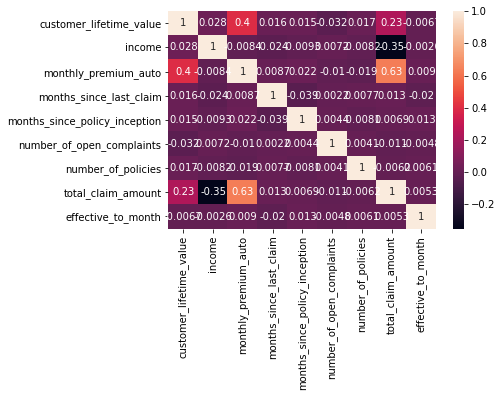

In [67]:
sns.heatmap(correl_matrix, annot=True, )
plt.show()